___
# Source Code for Problem Set 3
-  Quantum Technology, PHY 602, D.Aggelakis, TUC
-  Author: Chris Tsiaousis, Pregraduate student
___

### General Imports

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, Aer, assemble ,execute ,transpile, IBMQ 

from math import pi, sqrt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_textbook.tools import array_to_latex

style = {'backgroundcolor': 'lightgreen'}  

# oi 3 simulators
svsim = Aer.get_backend('statevector_simulator')
usim = Aer.get_backend('unitary_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')

shots=1000 #gia to qasm_simulator , poses fores na trexei

### Exercise 1
___
As shown in Problem Set 1, we know that for $\lambda_1 = 1$ the eigenvector is 
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\ket{u_1} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1 
\end{pmatrix}
$


and for $\lambda_2 = -1$ the eigenvector is 
$\ket{u_2} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1 
\end{pmatrix}
$

___

We now want to *prove* that $X\ket{u_j} = \lambda_j\ket{u_j} ,\quad j={1,2}$


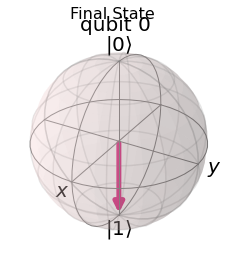

In [2]:
u_1 = [1/sqrt(2), 1/sqrt(2)]  # Define state |u_1>
u_2 = [1/sqrt(2), -1/sqrt(2)]  # Define state |u_2>

qc = QuantumCircuit(1)
qc.x(0)
# qc.measure_all()

# trexo pali to statevector_simulator gia na paro tin teliki katastasi 
test = transpile(qc,svsim)
qobj = assemble(test)
final_state = svsim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(final_state, title="Final State"))

### Exercise 2
___

##### Circuit 1

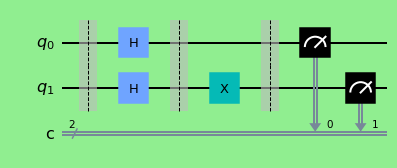

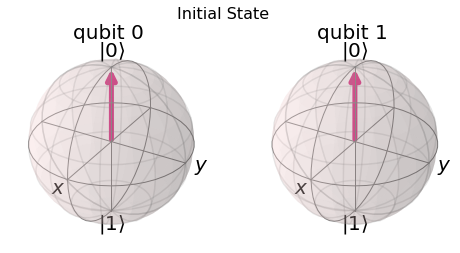

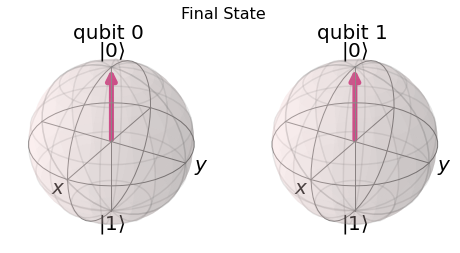

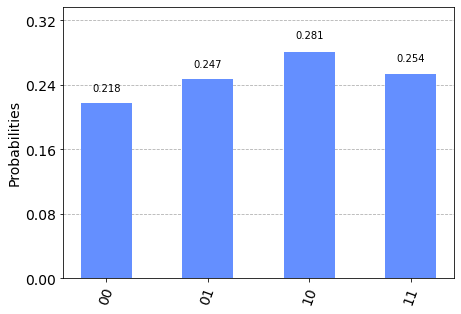

In [3]:
# quantum circuit with 2 qubit and 2 classical bits
qc = QuantumCircuit(2,2)

#We run statevector_simulator to find the initial state 00
test = transpile(qc,svsim)
qobj = assemble(test)
initial_state = svsim.run(qobj).result().get_statevector()

#the circuit
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.x(1)
qc.barrier()

qc.measure(0,0)   #save measurment to the first classical bit
qc.measure(1,1)   #save measurment to the second classical bit

display(qc.draw(output='mpl',style=style))

# trexo pali to statevector_simulator gia na paro tin teliki katastasi 
test = transpile(qc,svsim)
qobj = assemble(test)
final_state = svsim.run(qobj).result().get_statevector()
# display(test.draw(output='mpl',style=style)) #we can see that the transpiler did not change our circuit

display(plot_bloch_multivector(initial_state, title="Initial State"))
display(plot_bloch_multivector(final_state, title="Final State"))

#trexoume ton qasm_simulator
job = execute(qc, qasm_sim, shots=shots)
counts = job.result().get_counts()
display(plot_histogram(counts))

##### Circuit 2

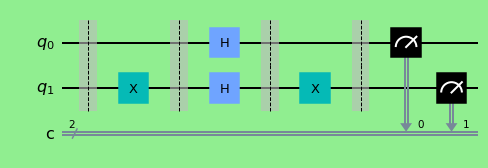

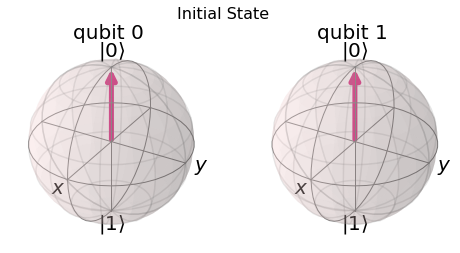

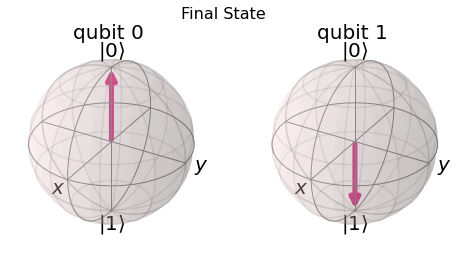

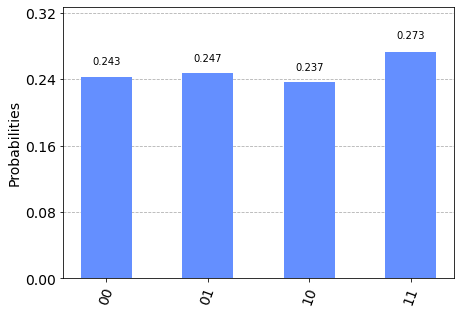

In [4]:
# quantum circuit with 2 qubit and 2 classical bits
qc = QuantumCircuit(2,2)

#We run statevector_simulator to find the initial state 00
test = transpile(qc,svsim)
qobj = assemble(test)
initial_state = svsim.run(qobj).result().get_statevector()

#the circuit
qc.barrier()
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
qc.x(1)
qc.barrier()

qc.measure(0,0)   #save measurment to the first classical bit
qc.measure(1,1)   #save measurment to the second classical bit

display(qc.draw(output='mpl',style=style))

# trexo pali to statevector_simulator gia na paro tin teliki katastasi 
test = transpile(qc,svsim)
qobj = assemble(test)
final_state = svsim.run(qobj).result().get_statevector()
# display(test.draw(output='mpl',style=style)) #we can see that the transpiler did not change our circuit

display(plot_bloch_multivector(initial_state, title="Initial State"))
display(plot_bloch_multivector(final_state, title="Final State"))

#trexoume ton qasm_simulator
job = execute(qc, qasm_sim, shots=shots)
counts = job.result().get_counts()
display(plot_histogram(counts))

### Exercise 3
___

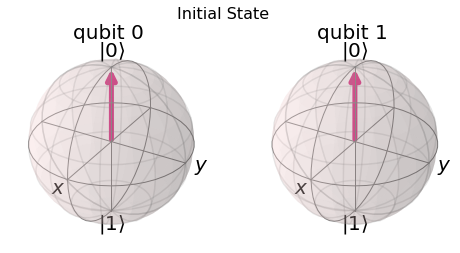

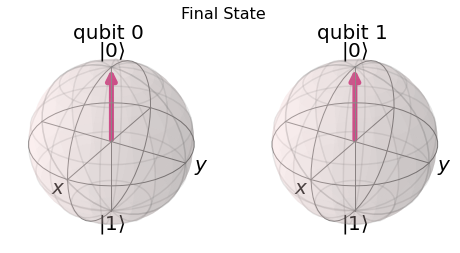

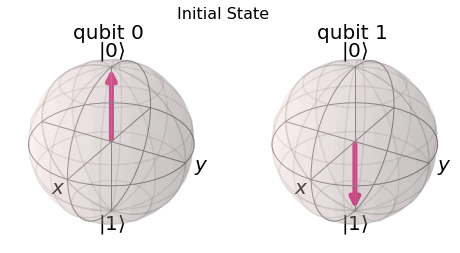

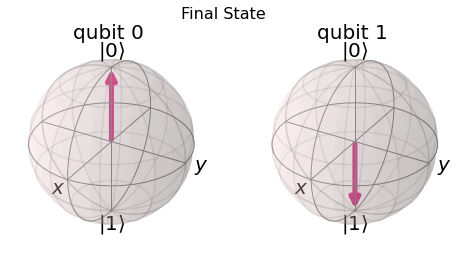

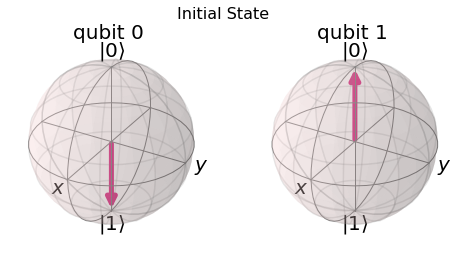

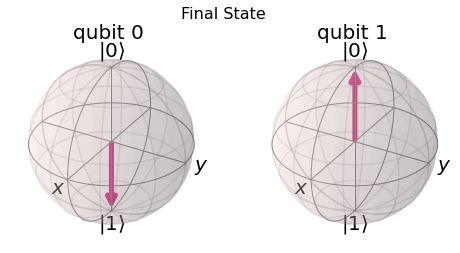

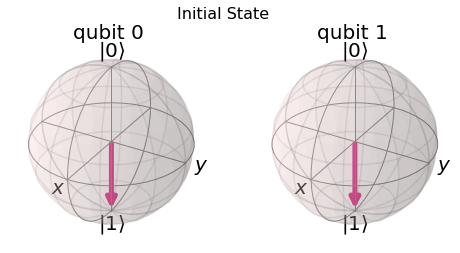

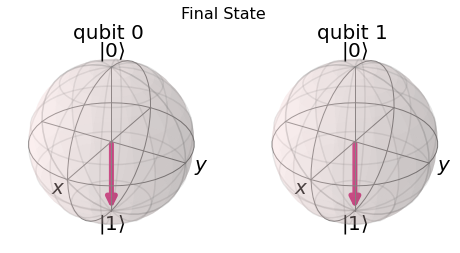

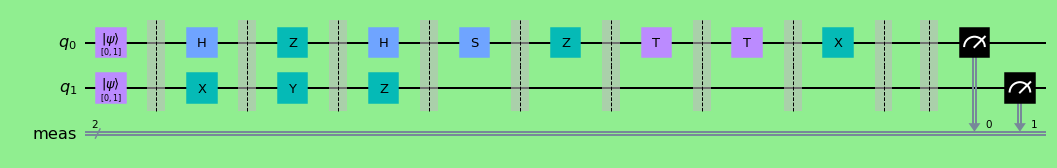

In [5]:
def getState(i):
    if(i==0):
        return [1, 0]
    return [0, 1]

def getStatePair(i, j):
    if(i==0 and j==0):
        return [1, 0, 0, 0]
    if(i==0 and j==1):
        return [0, 0, 1, 0]
    if(i==1 and j==0):
        return [0, 1, 0, 0]
    return [0, 0, 0, 1]

def getCircWithInitial(i, j):
#let us create a function that returns the circuit with different
#initializations and bruteforce all posibilities of initial states

    # quantum circuit with 2 qubits
    qc = QuantumCircuit(2)
    #force the initial state
    qc.initialize(getState(i), 0)
    qc.initialize(getState(j), 1)
    #the circuit
    qc.barrier()
    qc.h(0)
    qc.x(1)
    qc.barrier()
    qc.z(0)
    qc.y(1)
    qc.barrier()
    qc.h(0)
    qc.z(1)
    qc.barrier()
    qc.s(0)
    qc.barrier()
    qc.z(0)
    qc.barrier()
    qc.t(0)
    qc.barrier()
    qc.t(0)
    qc.barrier()
    qc.x(0)
    qc.barrier()
    qc.measure_all()
    return qc


for x in [0, 1]:
    for y in [0, 1]:
        display(plot_bloch_multivector(getStatePair(x, y), title="Initial State"))
        qc = getCircWithInitial(x, y)
        test = transpile(qc,svsim)
        qobj = assemble(test)
        final_state = svsim.run(qobj).result().get_statevector()
        display(plot_bloch_multivector(final_state, title="Final State"))
        
        
        
display(qc.draw(output='mpl',style=style))



**From the output above,**  
**we can conclude that for each initial state, we get the same final state, and therefore the unitary of the circuit is the *Identity* matrix**
___

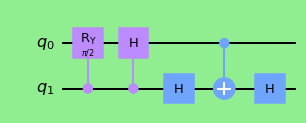

<IPython.core.display.Math object>

In [6]:
# quantum circuit with 2 qubit and 2 classical bits
qc = QuantumCircuit(2)

#We run statevector_simulator to find the initial state 00
test = transpile(qc,svsim)
qobj = assemble(test)
initial_state = svsim.run(qobj).result().get_statevector()

#the circuit
qc.cry(pi/2,1,0)
qc.ch(1,0)
qc.h(1)
qc.cx(0,1)
qc.h(1)

display(qc.draw(output='mpl',style=style))

#trexo unitary_simulator gia na paro to matrix representation tou kuklomatos
test = transpile(qc,usim)
qobj = assemble(test)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary , pretext = "\\text{Circuit}=")

### Exercise 4
___

In [7]:
def oracleType(qc, function):
    if (function == "constant"):
        qc.h(0)
        qc.x(0)
        qc.h(0)
    
    if (function == "balanced"):
        qc.h(0)
        qc.h(1)
        qc.x(0)
        qc.x(1)
        qc.h(0)
        qc.h(1)


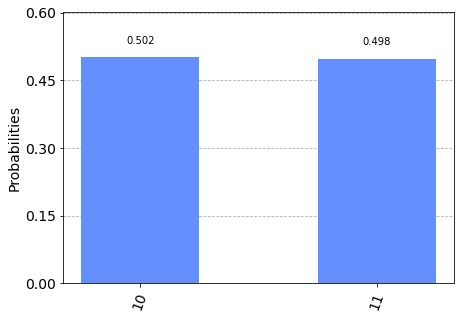

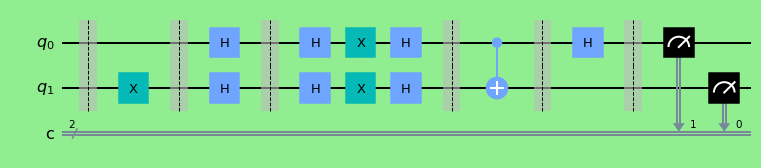

In [8]:
qc = QuantumCircuit(2, 2)
qc.barrier()
qc.x(1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.barrier()
oracleType(qc, "balanced")
qc.barrier()
qc.cx(0, 1)
qc.barrier()
qc.h(0)
qc.barrier()

# Measures the qubits on a circuit
qc.measure(0, 1)
qc.measure(1, 0)
# Running the circuit on a simulator which will give you theoretical results
#trexoume ton qasm_simulator
job = execute(qc, qasm_sim, shots=shots)
counts = job.result().get_counts()
display(plot_histogram(counts))

display(qc.draw(output='mpl',style=style))

### Exercise 5
___
##### Grover's Algorithm with 3 qubits
![sample circuit](https://qiskit.org/textbook/ch-algorithms/images/grover_circuit_3qubits.png)

In [9]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s



In [10]:


qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"
grover_circuit = QuantumCircuit(3)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(3), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├──────
        ├───┤│             ││        │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 U$_\omega$ ├┤1 U$_s$ ├─░──╫─┤M├───
        ├───┤│             ││        │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2            ├┤2       ├─░──╫──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════╩══╩══╩═
                                          0  1  2